In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
df = pd.read_csv('AAPL.csv')

# Display the first few rows and info to understand the data structure
display(df.head())
df.info()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       184 non-null    object 
 1   Open       184 non-null    float64
 2   High       184 non-null    float64
 3   Low        184 non-null    float64
 4   Close      184 non-null    float64
 5   Adj Close  184 non-null    float64
 6   Volume     184 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.2+ KB


In [2]:
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the DataFrame's index
df.set_index('Date', inplace=True)

# Calculate daily returns using the percentage change of the 'Close' price
df['Daily Returns'] = df['Close'].pct_change()

# Calculate the 20-day Simple Moving Average (SMA) of the 'Close' price
df['20-Day SMA'] = df['Close'].rolling(window=20).mean()

# Display the first few rows of the DataFrame with the new columns
display(df.head())

,Open,High,Low,Close,Adj Close,Volume,Daily Returns,20-Day SMA
Date,,,,,,,,
2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700,NaN,NaN
2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200,0.011142,NaN
2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800,-0.030378,NaN
2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900,0.077301,NaN
2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600,0.026421,NaN


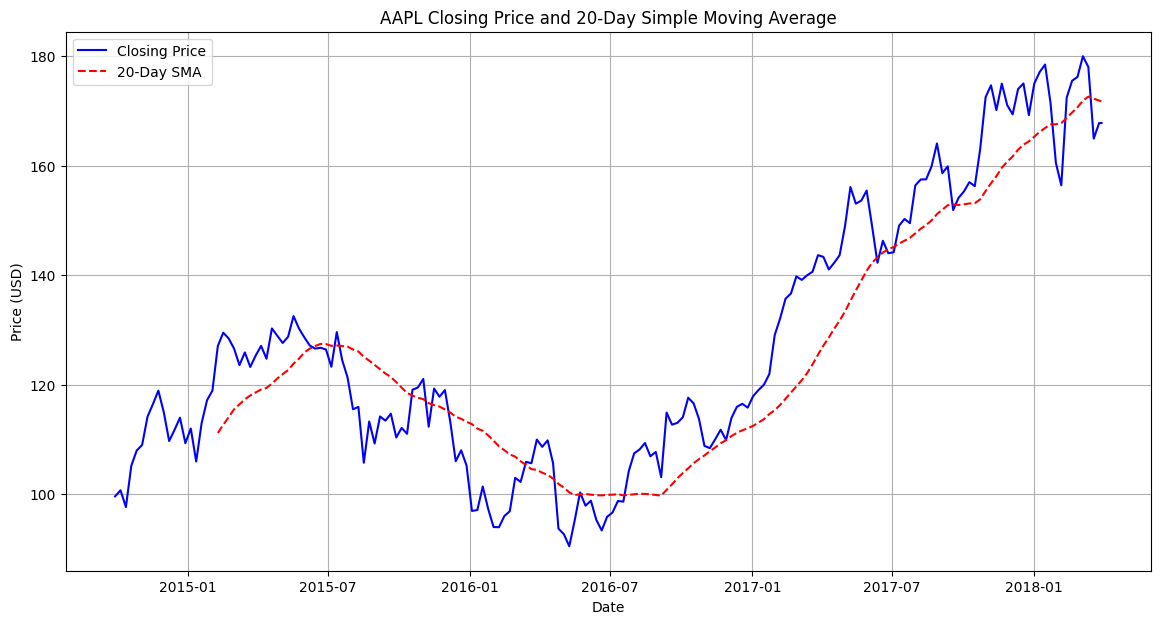

In [3]:
# Create a figure and axes for the plot
plt.figure(figsize=(14, 7))

# Plot the 'Close' price
plt.plot(df['Close'], label='Closing Price', color='blue')

# Plot the '20-Day SMA'
plt.plot(df['20-Day SMA'], label='20-Day SMA', color='red', linestyle='--')

# Add a title and labels for clarity
plt.title('AAPL Closing Price and 20-Day Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

# Add a legend to distinguish between the plotted lines
plt.legend()

# Add a grid for better readability
plt.grid(True)

# Display the plot
plt.show()